In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.image as mpimg

np.random.seed(42)
%load_ext autoreload
%autoreload 2

# loading and unpacking erp data

In [62]:
erp_data = np.load('erp.npz')
erp=erp_data['erp']
timepoints=erp_data['timepoints']
chan_locs_x=erp_data['chan_locs_x']
chan_locs_y=erp_data['chan_locs_y']
conditions = erp_data['conditions']

In [122]:
idx = np.isin(timepoints,timepoints[::4])
erp = erp[:,:,idx]
timepoints = timepoints[idx]

# functions

In [160]:
def create_topo(i_timepoint, erp, timepoints, chan_locs_x, chan_locs_y):
    """
    i_timepoint (int): frame of data
    erp (np.array): erp data. Has shape [timepoints, electrodes]
    timepoints (list): timepoints for trial
    chan_locs_x (list): x-coordinates for EEG electrodes
    chan_locs_y (list): y-coordinates for EEG electrodes
    """
    plt.clf()
    # create grid for interpolation
    grid_x, grid_y = np.mgrid[-1:1:1000j, -1:1:2000j]
    # grab single timepoint
    erp_timepoint = erp[:,i_timepoint]
    # interpolate data across scalp
    interp = interpolate.griddata((chan_locs_y, chan_locs_x),erp_timepoint,(grid_x,grid_y),method='cubic')

    # load task image
    # img = mpimg.imread(task_image_map[i_timepoint])

    # plotting 
    ax = plt.subplot(111)
    ax.axis('off')

    interp_plot = plt.imshow(interp.T, extent=(0,1,0,1), cmap='coolwarm',vmin=-3,vmax=3)
    ax.invert_yaxis() #to make EEG 'head' face the screen
    plt.colorbar(interp_plot,ticks=np.arange(-3,3.1,1),extend='both')
    # plt.title(i_timepoint)

In [141]:
def create_task(i_timepoint, task_image_map, timepoints):
    """
    i_timepoint (int): frame of data    
    task_images (np.array(str)): maps task images directories to timing
    """
    plt.clf()

    # load task image
    img = mpimg.imread(task_image_map[i_timepoint])

    # plotting 
    ax = plt.subplot(111)
    ax.axis('off')
    ax.imshow(img)
    plt.title(f'{timepoints[i_timepoint]} ms',fontsize=32)

In [48]:
def create_task_image_map(task_images,task_image_timing,timepoints):
    image_idx = 0
    task_map = np.empty(timepoints.shape,dtype='object')
    for itime,time in enumerate(timepoints):
        if image_idx < len(task_image_timing)-1:
            if time >= task_image_timing[image_idx+1]:
                image_idx +=1
        task_map[itime] = task_images[image_idx]
    return task_map

# creating gif

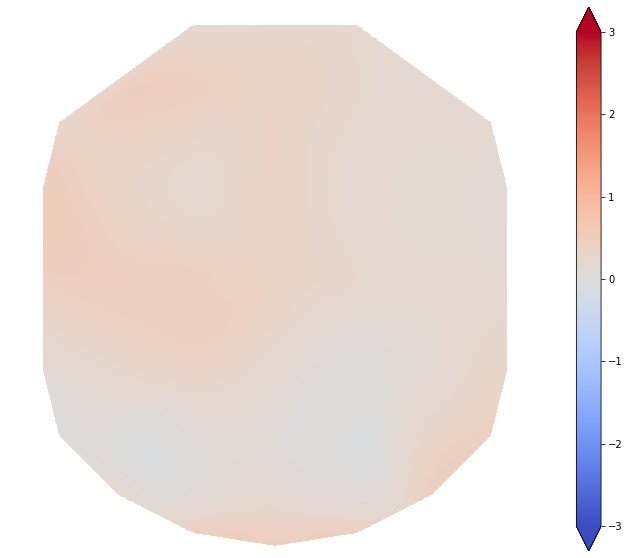

In [175]:
# topo gif
fig = plt.figure(figsize=(12,10))
ani = animation.FuncAnimation(fig, create_topo, fargs=(erp[1] - erp[0], timepoints,chan_locs_x,chan_locs_y), frames=len(timepoints), repeat=True)
writer = animation.writers['pillow']
writer = writer(fps=10)
ani.save('erpsub.gif',writer=writer)

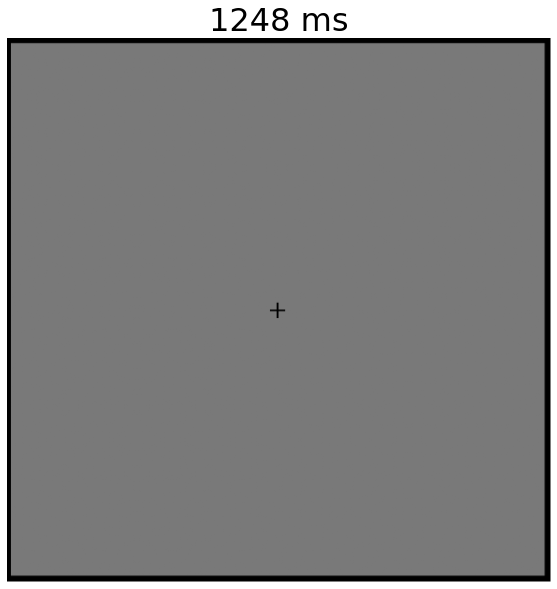

In [165]:
# task gif images
task_images = np.array(['images/blank.png','images/array1.png','images/blank.png'])
task_image_timing = [-200,0,250]
task_image_map = create_task_image_map(task_images,task_image_timing,timepoints)

# task gif
fig = plt.figure(figsize=(10,10))
ani = animation.FuncAnimation(fig, create_task, fargs=(task_image_map,timepoints), frames=len(timepoints), repeat=True)
writer = animation.writers['pillow']
writer = writer(fps=10)
ani.save('task1.gif',writer=writer)

In [176]:
import winsound
winsound.PlaySound("SystemExit",winsound.SND_ALIAS)

# showing individual function calls

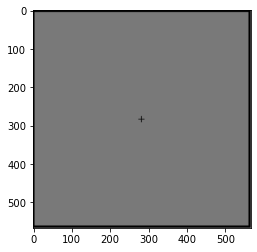

In [132]:
task_images = np.array(['images/blank.png','images/array.png','images/blank.png'])
task_image_timing = [-200,0,250]

task_image_map = create_task_image_map(task_images,task_image_timing,timepoints)
img = mpimg.imread(task_image_map[100])
plt.imshow(img)

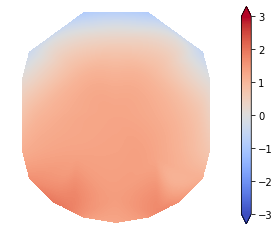

In [174]:
create_topo(i_timepoint=75, erp=erp[0] - erp[], timepoints=timepoints, chan_locs_x=chan_locs_x, chan_locs_y=chan_locs_y)

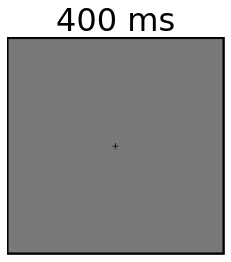

In [170]:
create_task(75, task_image_map,timepoints)